# IA-340 Mini Project: U.S. Border Crossings

## Question
which regions have the most legal border crossings for both the US-Mexico and US-Canada Border? The answer to this question could be used to prioritize resource distribution for border security and give reason for infrastrure investment.
## Source
URL: https://catalog.data.gov/dataset/border-crossing-entry-data-683ae

Author: Department of Transportation

Description: Contains legal border crossing entry data for the United States on the US-Mexico and US-Canada Border between 1996 to current.

Reasoning: This data was chosed due to its relevance to the question and its credibility/accuracy.

## Data Cleaning Process
To clean the data, I first removed the latitude, longitude, and point columns as they were only needed for physical mapping and not trend identification.

The second action was removing any data with missing variables and duplicates.

The third action was changing the Date into a format recognized by python. 

Upon looking at the data, there were no significant errors 

The Query used was to sort the states based on their total border crossings in descending order. One takeaway from this is that the southern states like Texas and California contain the largest amounts of border crossings while others have a steap drop off in comparison.

In [1]:
import pandas as pd

df = pd.read_csv('s3://ia-340-375976432/Border_Crossing_Entry_Data.csv')

df.head()

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


In [2]:
df.drop(['Latitude', 'Longitude', 'Point'], axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

/tmp/ipykernel_8560/4201194826.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Port Name,State,Port Code,Border,Date,Measure,Value
0,Jackman,Maine,104,US-Canada Border,2024-01-01,Trucks,6556
1,Porthill,Idaho,3308,US-Canada Border,2024-04-01,Trucks,98
2,San Luis,Arizona,2608,US-Mexico Border,2024-04-01,Buses,10
3,Willow Creek,Montana,3325,US-Canada Border,2024-01-01,Pedestrians,2
4,Warroad,Minnesota,3423,US-Canada Border,2024-01-01,Personal Vehicle Passengers,9266


In [3]:
df.describe()

,Port Code,Date,Value
count,403843.000000,403843,4.038430e+05
mean,2445.250924,2009-06-01 10:16:34.218049792,2.905923e+04
min,101.000000,1996-01-01 00:00:00,0.000000e+00
25%,2304.000000,2002-10-01 00:00:00,0.000000e+00
50%,3012.000000,2009-02-01 00:00:00,1.530000e+02
75%,3401.000000,2015-06-01 00:00:00,3.086000e+03
max,3814.000000,2025-08-01 00:00:00,4.447374e+06
std,1204.539861,NaN,1.494397e+05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403843 entries, 0 to 403856
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Port Name  403843 non-null  object        
 1   State      403843 non-null  object        
 2   Port Code  403843 non-null  int64         
 3   Border     403843 non-null  object        
 4   Date       403843 non-null  datetime64[ns]
 5   Measure    403843 non-null  object        
 6   Value      403843 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 24.6+ MB


In [19]:
df["Date"] = pd.to_datetime(df["Date"], format="%b %Y", errors="coerce")
df = df[(df["Date"].dt.year >= 2000) & (df["Date"].dt.year <= 2025)]

state_totals = df.groupby("State")["Value"].sum().reset_index()

state_totals_sorted = state_totals.sort_values(by="Value", ascending=False)

print(state_totals_sorted)

           State       Value
11         Texas  3567924457
2     California  2697091905
1        Arizona   919358420
9       New York   782405865
5       Michigan   668294716
13    Washington   477358828
4          Maine   199038170
12       Vermont   109724158
6      Minnesota    92303377
8     New Mexico    82657666
10  North Dakota    79070073
7        Montana    53079323
3          Idaho    21307680
0         Alaska    14743635


## Visualizations
The first Visualization represents the number of legal border crossings occuring at the US-Canada Border and US-Mexico Border. Some notable takeaways includes a steady decrease of border crossings between 2000 and 2012 as well as a sharp decrease in 2020 which represents the Covid Pandemic. Since then, the border crossings has stabalized and continues to trend downwards. Overall, the U.S. Mexican border has been considerably more active than the U.S. Canada border with the gap increasing in recent years. Another notable finding is that there is an influx of border crossings on the Canadian border based on season which could be correlated with vacations. Individuals are more likely to go to Canada in the summer months where the weather is managable while the opposite happens in the winter months.

The second visualization represents the percentage of total border crossings tied to each state between 2000 and 2025. The largest percentages of border crossings occured in Texas, California, and Arizona accounting for over half of all border crossings during this time frame. In the north, New york and Michigan held the highest percentages most likely being hubs of trade between the U.S. and Canada.

The third visualization represents the top 10 border ports based on total border crossings between the year 2000 and 2025. There are three standouts with San Ysidro, El Paso, and Laredo containing the most border crossings. The remaining ports tended to contain similar amounts which shows that resources should be concentrated in the afformentioned locations

Matplotlib is building the font cache; this may take a moment.


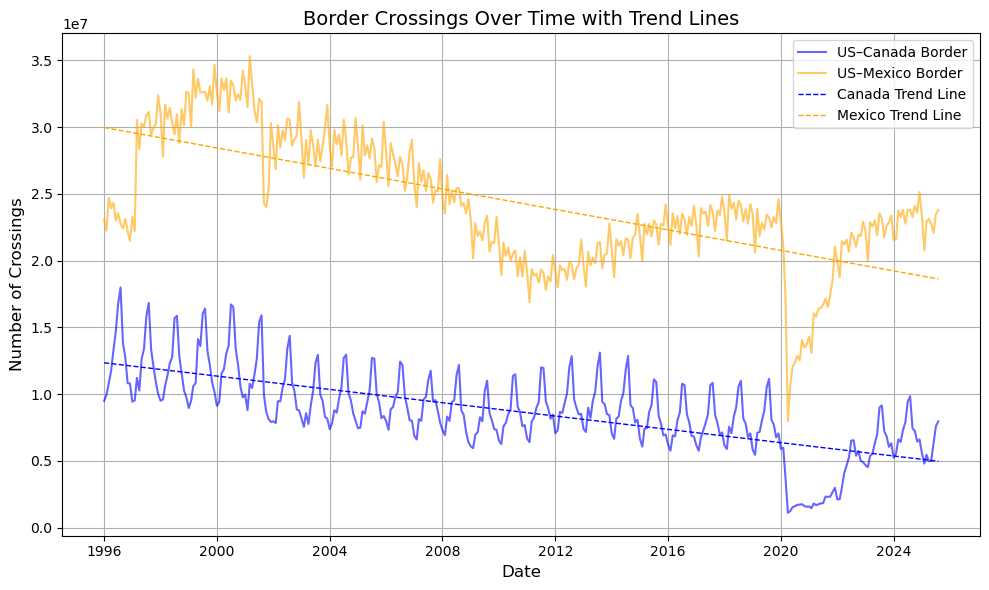

In [5]:
import matplotlib.pyplot as plt
import numpy as np



canada = df[df['Border'] == 'US-Canada Border']
mexico = df[df['Border'] == 'US-Mexico Border']

canada_grouped = canada.groupby('Date')['Value'].sum().reset_index()
mexico_grouped = mexico.groupby('Date')['Value'].sum().reset_index()

canada_grouped['Date_num'] = canada_grouped['Date'].map(pd.Timestamp.toordinal)
mexico_grouped['Date_num'] = mexico_grouped['Date'].map(pd.Timestamp.toordinal)

canada_fit = np.polyfit(canada_grouped['Date_num'], canada_grouped['Value'], 1)
mexico_fit = np.polyfit(mexico_grouped['Date_num'], mexico_grouped['Value'], 1)

canada_trend = np.polyval(canada_fit, canada_grouped['Date_num'])
mexico_trend = np.polyval(mexico_fit, mexico_grouped['Date_num'])

plt.figure(figsize=(10,6))
plt.plot(canada_grouped['Date'], canada_grouped['Value'], label='US–Canada Border', color='blue', alpha=0.6)
plt.plot(mexico_grouped['Date'], mexico_grouped['Value'], label='US–Mexico Border', color='orange', alpha=0.6)

plt.plot(canada_grouped['Date'], canada_trend, '--', color='blue', linewidth=1, label='Canada Trend Line')
plt.plot(mexico_grouped['Date'], mexico_trend, '--', color='orange', linewidth=1, label='Mexico Trend Line')

plt.title('Border Crossings Over Time with Trend Lines', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Crossings', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show chart
plt.show()

In [ ]:
!pip install geopandas matplotlib pandas

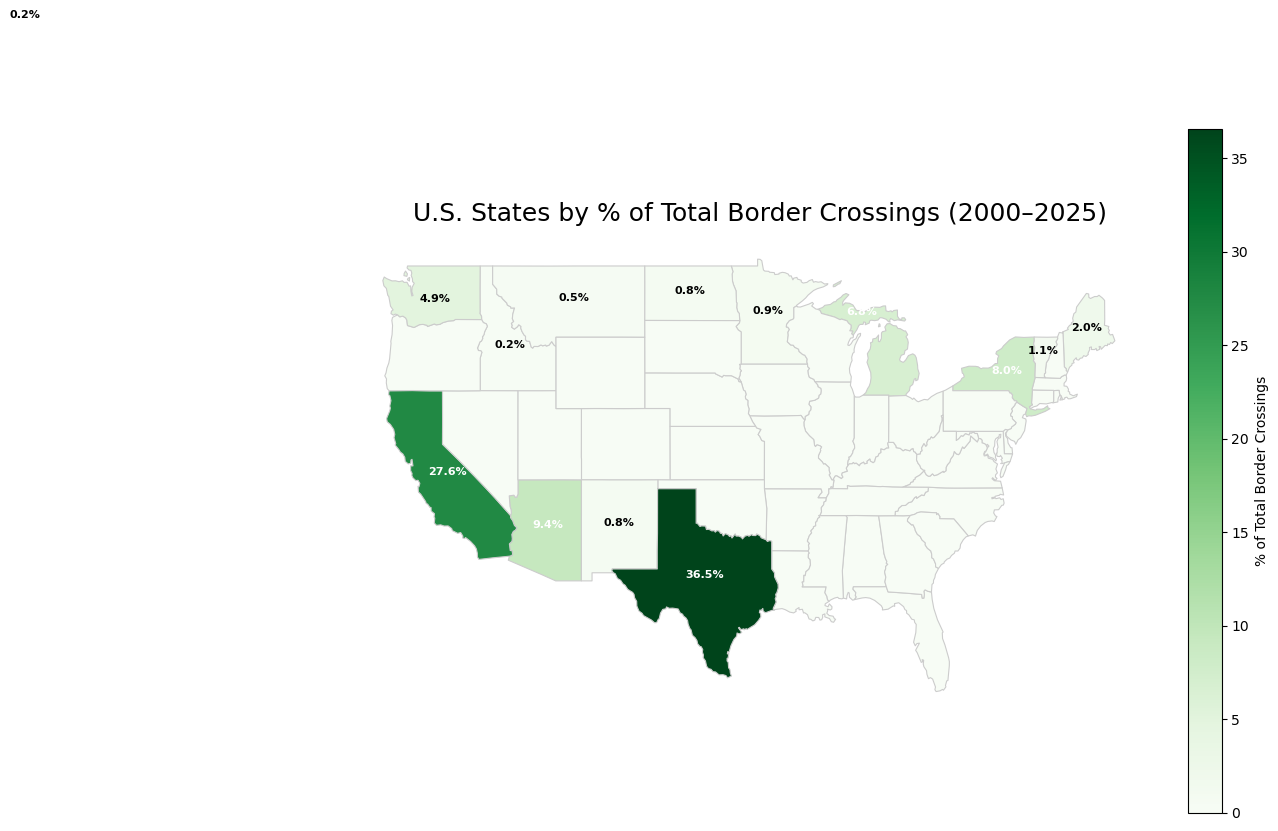

In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# === Load and prepare data ===
df["Date"] = pd.to_datetime(df["Date"], format="%b %Y", errors="coerce")
df = df[(df["Date"].dt.year >= 2000) & (df["Date"].dt.year <= 2025)]

state_totals = df.groupby("State")["Value"].sum().reset_index()
state_totals["Percent"] = (state_totals["Value"] / state_totals["Value"].sum()) * 100

url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
states_geo = gpd.read_file(url)

merged = states_geo.merge(state_totals, left_on="name", right_on="State", how="left")
merged["Percent"] = merged["Percent"].fillna(0)

# === Plot ===
fig, ax = plt.subplots(figsize=(14, 9))
merged.plot(
    column="Percent",
    cmap="Greens",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    legend_kwds={"label": "% of Total Border Crossings", "orientation": "vertical"},
    ax=ax
)

# Add percent labels
for idx, row in merged.iterrows():
    if row["geometry"].geom_type == "Polygon":
        x, y = row["geometry"].centroid.x, row["geometry"].centroid.y
    else:
        x, y = row["geometry"].representative_point().x, row["geometry"].representative_point().y
    
    label = f"{row['Percent']:.1f}%" if row["Percent"] > 0 else ""
    ax.text(
        x, y, label,
        horizontalalignment='center',
        fontsize=8,
        color='black' if row["Percent"] < 5 else 'white',
        weight='bold'
    )

# === Center the view on the mainland U.S. ===
ax.set_xlim([-125, -65])  # longitude range (west to east)
ax.set_ylim([25, 50])     # latitude range (south to north)

# === Titles & styling ===
ax.set_title("U.S. States by % of Total Border Crossings (2000–2025)", fontsize=18, pad=20)
ax.axis("off")

plt.tight_layout()
plt.show()


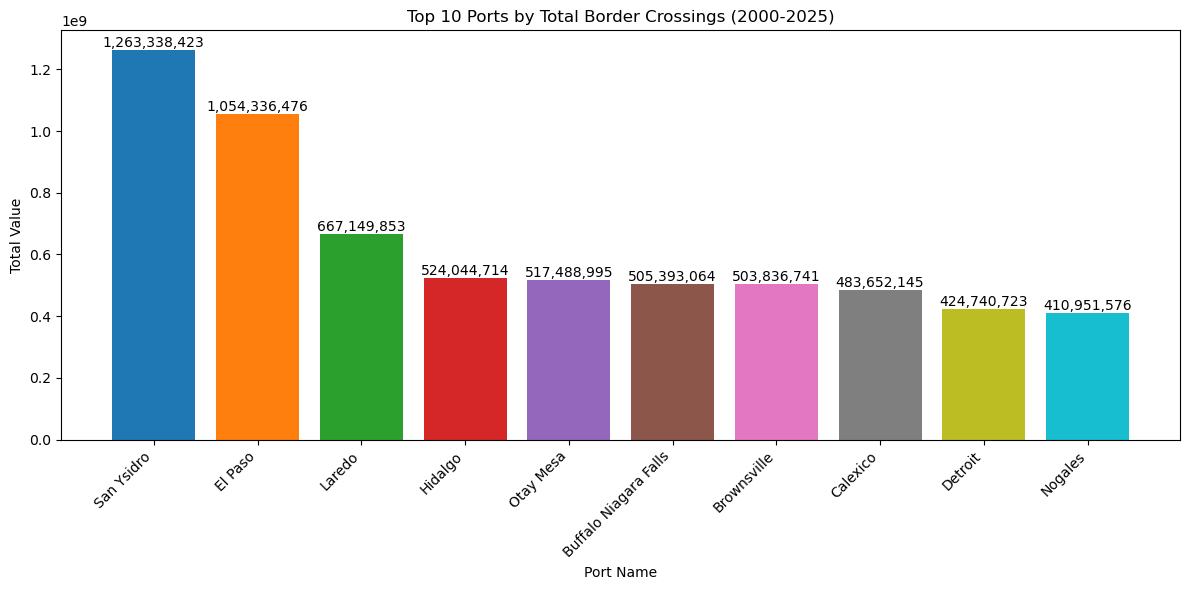

In [28]:

# Group by Port Name and sum the Value column
port_totals = df.groupby('Port Name')['Value'].sum().reset_index()

# Sort by total value and get the top 10 ports
top_10_ports = port_totals.sort_values(by='Value', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_ports['Port Name'], top_10_ports['Value'], color=[
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
])
plt.xlabel('Port Name')
plt.ylabel('Total Value')
plt.title('Top 10 Ports by Total Border Crossings (2000-2025)')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()